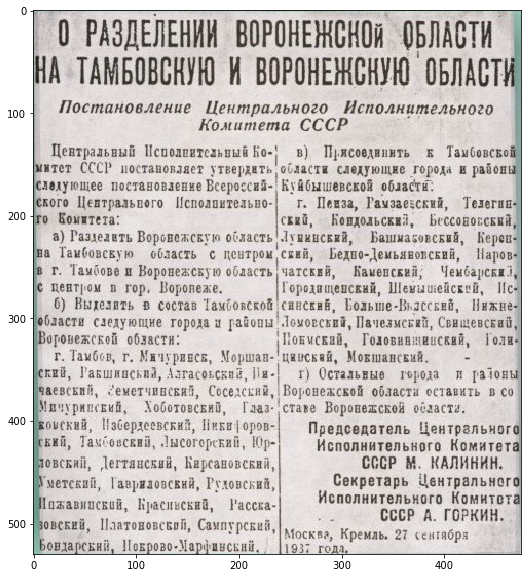

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('test.jpg')

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

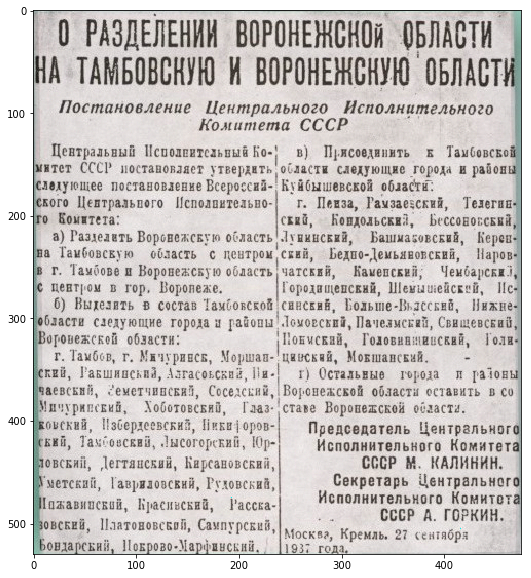

In [2]:
# Добавляем случайный шум
mean = 0
std = 1
noisy_img = img + np.random.normal(mean, std, img.shape)

plt.figure(figsize=(15,10))
plt.imshow(np.uint8(noisy_img))
plt.show()

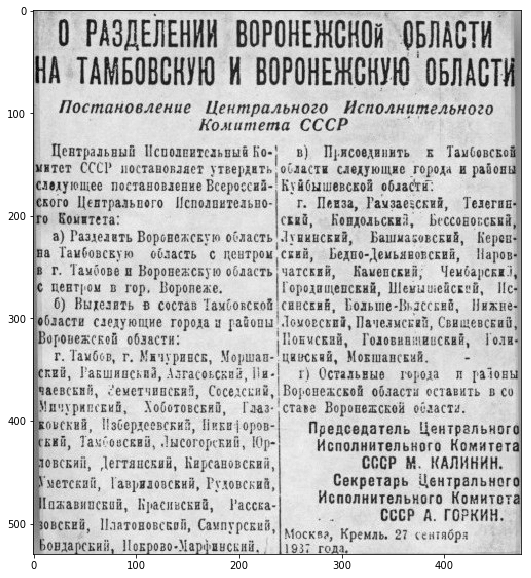

In [3]:
# Переводим изображение в серое
noisy_img = np.float32(noisy_img)

gray = (noisy_img[:,:,0] + noisy_img[:,:,1] + noisy_img[:,:,2])//3

plt.figure(figsize=(15,10))
plt.imshow(gray, cmap = 'gray')
plt.show()

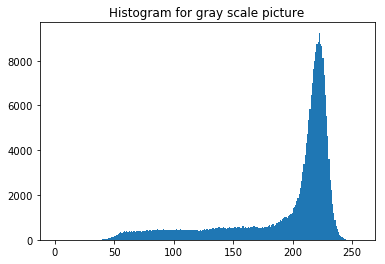

In [4]:
# Строим гистограмму изображения
hist = cv2.calcHist([gray],[0],None,[256],[0,256])

plt.hist(gray.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

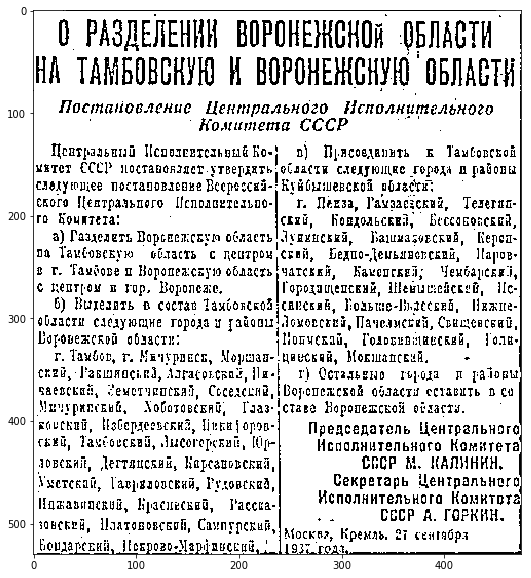

True

In [5]:
def Sauvola_binarization(img):

    # Область вокруг каждого пикселя 6 на 6 
    s = 6

    # Вычисляем интегральное изображение
    intImage = np.cumsum(np.cumsum(img, axis=1), axis=0)
    
    # Вычисляем интегральное изображение, 
    # предварительно возведя значение пискелей исходного изображения в квадрат,
    # чтобы затем вычислить c помощью этого интегрального изображения дисперсию
    intImage_2 = np.cumsum(np.cumsum(img ** 2, axis=1),axis=0)
    
    # Определяем координаты пикселей
    (rows,cols) = img.shape[:2]
    (X,Y) = np.meshgrid(np.arange(cols), np.arange(rows))
  
    # Превращаем координаты в вектор
    X = X.ravel()
    Y = Y.ravel()

    # Вычисляем координаты вершин каждой из областей 6 на 6 пискелей
    x1 = (X - s/2).astype(int)
    x2 = (X + s/2).astype(int)
    y1 = (Y - s/2).astype(int)
    y2 = (Y + s/2).astype(int)
    
    # Проверяем чтобы координаты областей не выходили за границы
    x1[x1 < 0] = 0
    x2[x2 >= cols] = cols - 1
    y1[y1 < 0] = 0
    y2[y2 >= rows] = rows - 1

    # Вычисляем сколько пикселей в каждой из областей
    count = (x2 - x1) * (y2 - y1)

    # Вычисляем координаты каждого угла прямоугольников
    r1_x = x2
    r1_y = y2
    r2_x = x2
    r2_y = y1 - 1
    r2_y[r2_y < 0] = 0
    r3_x = x1 - 1
    r3_x[r3_x < 0] = 0
    r3_y = y2
    r4_x = r3_x
    r4_y = r2_y
    
    # Вычисляем сумму значений в прямоугольниках интегральных изображений
    sums = intImage[r1_y, r1_x] - intImage[r2_y, r2_x] - intImage[r3_y, r3_x] + intImage[r4_y, r4_x]
    sums_2 = intImage_2[r1_y, r1_x] - intImage_2[r2_y, r2_x] - intImage_2[r3_y, r3_x] + intImage_2[r4_y, r4_x]

    result = np.ones(rows * cols, dtype=np.bool)
    
    # Матожидание
    mean = sums / count
    # Матожиадние для интегрального изображения, использующего квадраты
    mean_2 = sums_2 / count
    # Стандартное отклонение
    std = np.sqrt(1 / count * (mean_2 - (mean * mean) / count))
    # Вычисляем порог
    result[img.ravel() <= mean * (1 + 0.5 * (std / 128 - 1))] = False

    # Конвертируем в uint8
    result = 255 * np.reshape(result, (rows, cols)).astype(np.uint8)

    return result

output = Sauvola_binarization(gray)

plt.figure(figsize=(15,10))
plt.imshow(output,cmap = 'gray')
plt.show()

cv2.imwrite('output.jpg',output)